In [2]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings. simplefilter(action="ignore", category=FutureWarning )

In [3]:
df = pd.read_csv("data/nigeria_houses_data.csv")

In [4]:
df.shape

(24326, 8)

In [5]:
df.info(9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [6]:
df.head(12)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
7,2.0,2.0,3.0,6.0,Detached Bungalow,Epe,Lagos,12000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0


In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(24326, 8)

In [9]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [11]:
df["state"].value_counts()

state
Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         145
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Abia               9
Nasarawa           9
Kwara              9
Kogi               8
Cross River        2
Plateau            2
Kano               2
Katsina            2
Bayelsa            2
Borno              2
Niger              1
Name: count, dtype: int64

In [13]:
df_lagos = df[df["state"] == "Lagos"]
df_lagos.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0


In [15]:
price_corr = df ["price"].corr(df["bedrooms"])
price_corr

0.025733719858751

In [17]:
price_corr = df.groupby("bedrooms")["price"]. mean() / 1e6

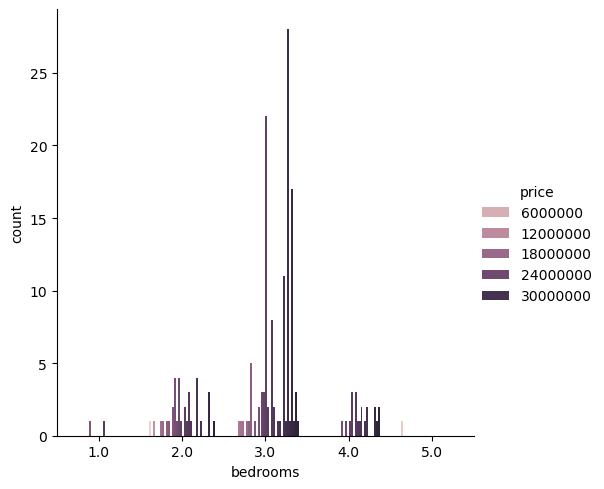

In [41]:
sns.catplot(data=df, x ="bedrooms" , hue ="price", kind = "count");

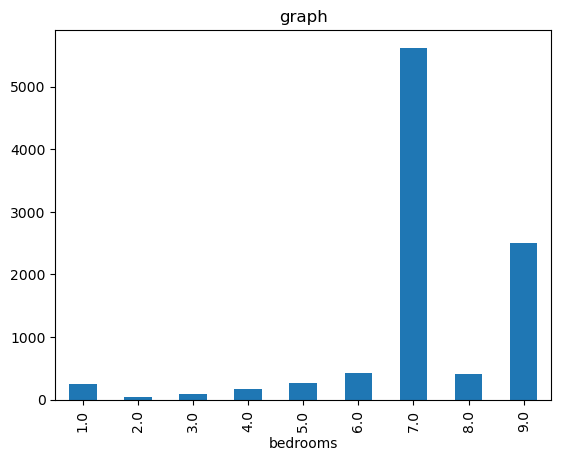

In [19]:
price_corr.plot(
    kind ="bar",
    x ="bedrooms",
    y ="price",
    title ="graph"
);

Text(0.5, 1.0, 'graphhh')

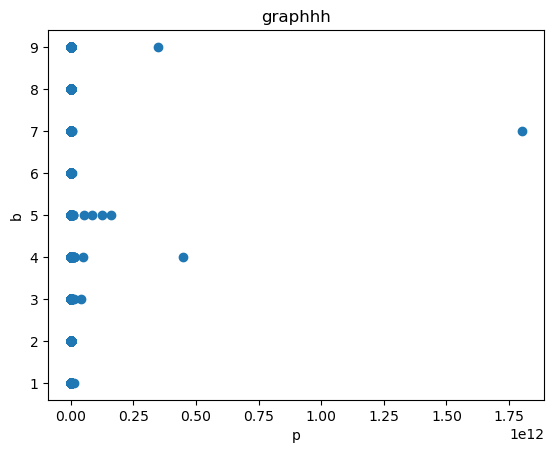

In [21]:
plt.scatter(x = df["price"], y = df["bedrooms"])
plt.xlabel("p")
plt.ylabel("b")
plt.title("graphhh")

In [23]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [25]:
mask_lg = df["state"].str.contains("Lagos")
df["state"] == "Lagos"
df_lg = df[mask_lg].head()
df_lg

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0


In [27]:
apt = df["title"] == "Terraced Duplexes"
df[apt].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
10,3.0,4.0,5.0,4.0,Terraced Duplexes,Lokogoma District,Abuja,25000000.0
16,4.0,4.0,5.0,4.0,Terraced Duplexes,Lekki,Lagos,48000000.0
21,3.0,3.0,4.0,4.0,Terraced Duplexes,Lekki,Lagos,34000000.0
22,4.0,5.0,5.0,2.0,Terraced Duplexes,Victoria Island (VI),Lagos,130000000.0


In [29]:
mask_price = df["price"] < 34000000.0
df[mask_price].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
7,2.0,2.0,3.0,6.0,Detached Bungalow,Epe,Lagos,12000000.0
10,3.0,4.0,5.0,4.0,Terraced Duplexes,Lokogoma District,Abuja,25000000.0
15,3.0,4.0,4.0,3.0,Detached Bungalow,Mowe Ofada,Ogun,12000000.0
33,2.0,3.0,5.0,4.0,Block of Flats,Mowe Ofada,Ogun,7000000.0
42,2.0,2.0,3.0,2.0,Block of Flats,Lekki,Lagos,30000000.0


In [31]:
df = df[mask_lg & apt & mask_price]

In [33]:
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
96,4.0,4.0,5.0,4.0,Terraced Duplexes,Ajah,Lagos,29800000.0
189,3.0,5.0,3.0,4.0,Terraced Duplexes,Lekki,Lagos,32000000.0
289,3.0,3.0,3.0,4.0,Terraced Duplexes,Lekki,Lagos,31000000.0
312,4.0,4.0,5.0,5.0,Terraced Duplexes,Ajah,Lagos,32000000.0
389,3.0,3.0,3.0,4.0,Terraced Duplexes,Lekki,Lagos,31000000.0
...,...,...,...,...,...,...,...,...
23363,3.0,3.0,4.0,2.0,Terraced Duplexes,Lekki,Lagos,30000000.0
23433,3.0,4.0,5.0,2.0,Terraced Duplexes,Ajah,Lagos,26500000.0
24044,4.0,4.0,5.0,2.0,Terraced Duplexes,Isheri North,Lagos,23000000.0
24045,3.0,3.0,4.0,4.0,Terraced Duplexes,Ajah,Lagos,30000000.0


In [35]:
mask_toi = df ["toilets"] == "4.0"

In [37]:
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
96,4.0,4.0,5.0,4.0,Terraced Duplexes,Ajah,Lagos,29800000.0
189,3.0,5.0,3.0,4.0,Terraced Duplexes,Lekki,Lagos,32000000.0
289,3.0,3.0,3.0,4.0,Terraced Duplexes,Lekki,Lagos,31000000.0
312,4.0,4.0,5.0,5.0,Terraced Duplexes,Ajah,Lagos,32000000.0
389,3.0,3.0,3.0,4.0,Terraced Duplexes,Lekki,Lagos,31000000.0
...,...,...,...,...,...,...,...,...
23363,3.0,3.0,4.0,2.0,Terraced Duplexes,Lekki,Lagos,30000000.0
23433,3.0,4.0,5.0,2.0,Terraced Duplexes,Ajah,Lagos,26500000.0
24044,4.0,4.0,5.0,2.0,Terraced Duplexes,Isheri North,Lagos,23000000.0
24045,3.0,3.0,4.0,4.0,Terraced Duplexes,Ajah,Lagos,30000000.0
